# Decision Tree

**Car Evaluation Dataset**

* Car Evaluation for different features becomes an important tool for recommendation to the users as per their requirements, and needs to be designed as a tool that can help in developing closer relationships between the automobile industry and its customers.

* It is useful in identifying cusotmer bases and loyalties as well as can be used for customer segmentation as per needs and income classes.

# Data Understanding

The data contains 1728 rows and 7 columns with descriptions as follows:

* buying: Buying Level or Capacity of the customer (Very High:vhigh, High:high, Low:low, Medium:med)
* maint: Maintainence Level (Very High:vhigh, High:high, Low:low, Medium:med)
* doors: Number of doors in the car (2, 3, 4 and 5 or more)
* lug_boot: Luggage Boot Size in the car (small, med, big)
* safety: Safety Level of Car (high, med, low)
* class: Unacceptable, Acceptable, VeryGood, Good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
data = pd.read_csv("C:/Users/Eric/Downloads/Jupyter Notebook/practical/data/car.data", names=columns)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.shape

(1728, 7)

In [6]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# From below output, it is clear that all the columns except 'class' are distributed equally among data.

In [10]:
for i in data.columns:
    print(data[i].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



# EDA

<AxesSubplot:xlabel='class', ylabel='count'>

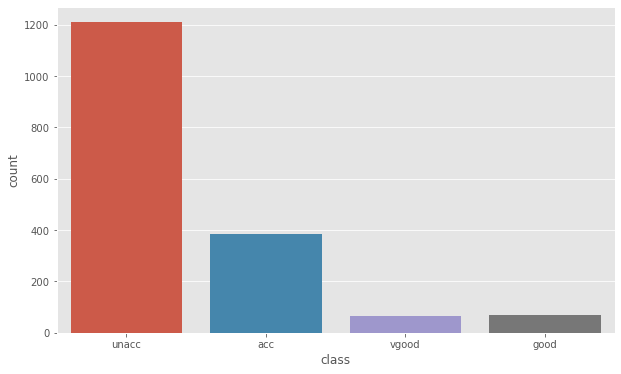

In [11]:
sns.countplot(data['class'])

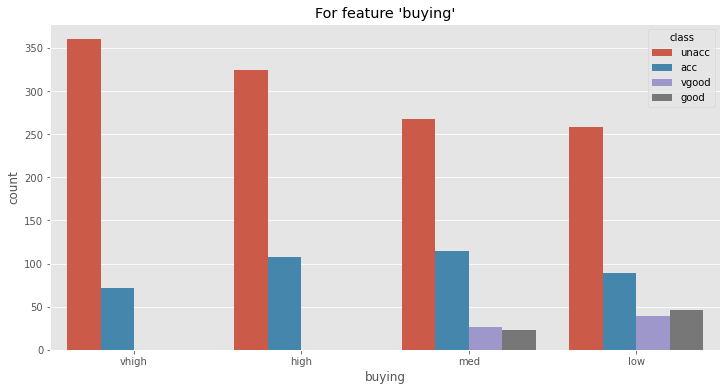

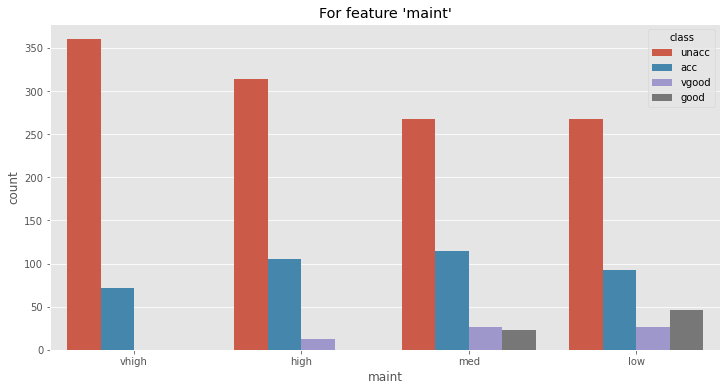

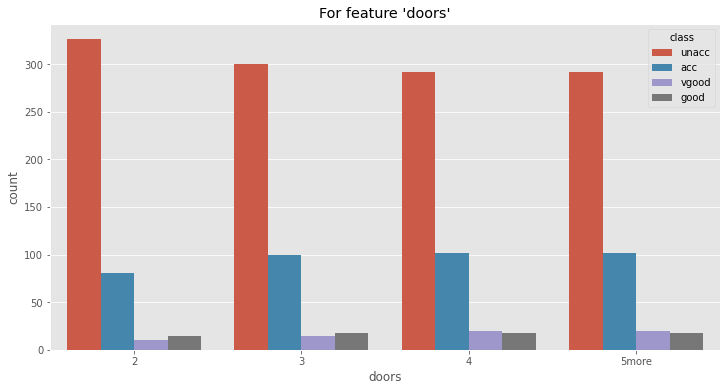

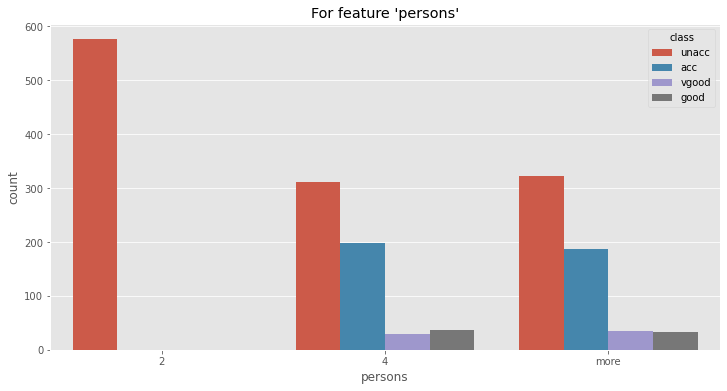

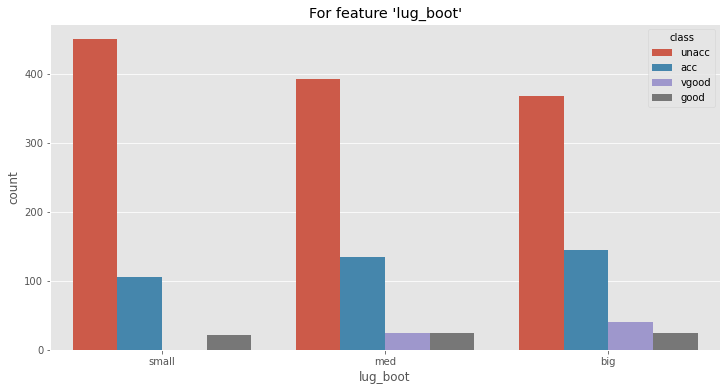

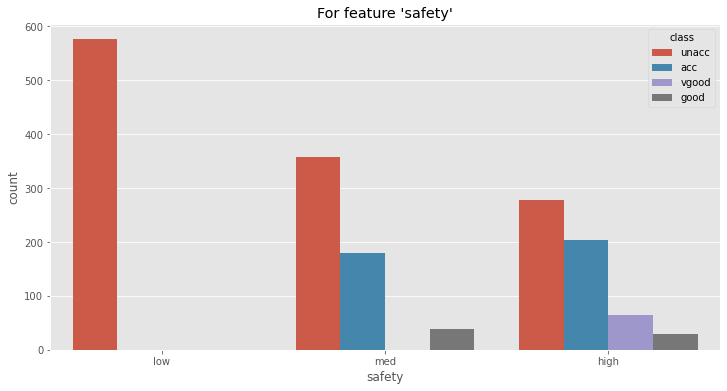

In [12]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

# Encode categorical variables

In [13]:
le=LabelEncoder()

In [14]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [15]:
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [16]:
X = data.drop(['class'], axis=1)

y = data['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [19]:
y_train.shape, y_test.shape

((1382,), (346,))

# instantiate the DecisionTreeClassifier model with criterion gini index

In [41]:
clf_gini = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=5, 
                                  random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [42]:
# Predict the Test set results with criterion gini index

y_pred_gini = clf_gini.predict(X_test)

In [43]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8699


# Check for overfitting and underfitting

In [44]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8734
Test set score: 0.8699


In [45]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 53   0  19  11]
 [  6   0   0   5]
 [  4   0 231   0]
 [  0   0   0  17]]


In [46]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        83
           1       0.00      0.00      0.00        11
           2       0.92      0.98      0.95       235
           3       0.52      1.00      0.68        17

    accuracy                           0.87       346
   macro avg       0.57      0.66      0.59       346
weighted avg       0.85      0.87      0.85       346



# Visualize decision-trees

[Text(343.17, 398.64, 'X[3] <= 0.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(309.69000000000005, 326.15999999999997, 'gini = 0.0\nsamples = 450\nvalue = [0, 0, 450, 0]'),
 Text(376.65000000000003, 326.15999999999997, 'X[5] <= 0.5\ngini = 0.572\nsamples = 932\nvalue = [301, 58, 525, 48]'),
 Text(251.10000000000002, 253.67999999999998, 'X[0] <= 2.5\ngini = 0.629\nsamples = 306\nvalue = [165, 25, 68, 48]'),
 Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.615\nsamples = 230\nvalue = [129, 25, 28, 48]'),
 Text(66.96000000000001, 108.71999999999997, 'X[1] <= 2.5\ngini = 0.378\nsamples = 79\nvalue = [59, 0, 20, 0]'),
 Text(33.480000000000004, 36.23999999999995, 'gini = 0.092\nsamples = 62\nvalue = [59, 0, 3, 0]'),
 Text(100.44000000000001, 36.23999999999995, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]'),
 Text(200.88000000000002, 108.71999999999997, 'X[1] <= 2.5\ngini = 0.654\nsamples = 151\nvalue = [70, 25, 8, 48]'),
 Text(167.40000000000003, 36.23999999

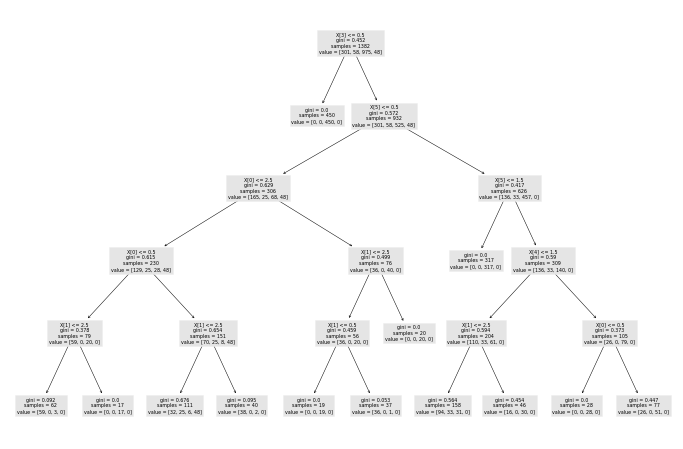

In [47]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# instantiate the DecisionTreeClassifier model with criterion entropy

In [34]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [35]:
# Predict the Test set results with criterion entropy

y_pred_en = clf_en.predict(X_test)

In [36]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8671


In [37]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8661
Test set score: 0.8671


[Text(285.97499999999997, 298.98, 'X[3] <= 0.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(258.075, 244.62, 'entropy = 0.0\nsamples = 450\nvalue = [0, 0, 450, 0]'),
 Text(313.875, 244.62, 'X[5] <= 0.5\nentropy = 1.463\nsamples = 932\nvalue = [301, 58, 525, 48]'),
 Text(209.25, 190.26000000000002, 'X[0] <= 2.5\nentropy = 1.677\nsamples = 306\nvalue = [165, 25, 68, 48]'),
 Text(111.6, 135.9, 'X[0] <= 0.5\nentropy = 1.658\nsamples = 230\nvalue = [129, 25, 28, 48]'),
 Text(55.8, 81.53999999999999, 'X[1] <= 2.5\nentropy = 0.816\nsamples = 79\nvalue = [59, 0, 20, 0]'),
 Text(27.9, 27.180000000000007, 'entropy = 0.28\nsamples = 62\nvalue = [59, 0, 3, 0]'),
 Text(83.69999999999999, 27.180000000000007, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]'),
 Text(167.39999999999998, 81.53999999999999, 'X[4] <= 1.5\nentropy = 1.694\nsamples = 151\nvalue = [70, 25, 8, 48]'),
 Text(139.5, 27.180000000000007, 'entropy = 1.299\nsamples = 97\nvalue = [42, 7, 0, 48]'),
 Text(1

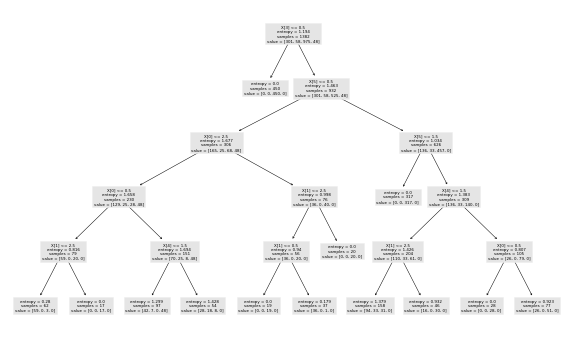

In [38]:
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [39]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 52   0  19  12]
 [  9   0   0   2]
 [  4   0 231   0]
 [  0   0   0  17]]


In [40]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70        83
           1       0.00      0.00      0.00        11
           2       0.92      0.98      0.95       235
           3       0.55      1.00      0.71        17

    accuracy                           0.87       346
   macro avg       0.57      0.65      0.59       346
weighted avg       0.85      0.87      0.85       346

